In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [2]:
df_train_id = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')

In [3]:
df_train_tr = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')

In [4]:
subm_df = pd.read_csv('/kaggle/input/ieee-fraud-detection/sample_submission.csv')

In [5]:
df_train_id.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
df_train_id.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [7]:
nan_counts_in_identity = df_train_id.isna().sum()
nan_counts_in_identity = nan_counts_in_identity[nan_counts_in_identity == 0]

nan_counts_in_identity

TransactionID    0
id_01            0
id_12            0
dtype: int64

In [8]:
df_train_tr.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
nan_counts_in_transaction = df_train_tr.isna().sum()
nan_counts_in_transaction = nan_counts_in_transaction[nan_counts_in_transaction ==0]

nan_counts_in_transaction

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
dtype: int64

In [10]:
df_train_tr['addr1']

0         315.0
1         325.0
2         330.0
3         476.0
4         420.0
          ...  
590535    272.0
590536    204.0
590537    231.0
590538    387.0
590539    299.0
Name: addr1, Length: 590540, dtype: float64

In [11]:
df_train_tr[df_train_tr['isFraud'] == 1]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590361,3577361,1,15807368,1224.000,W,3278,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590364,3577364,1,15807516,69.964,C,5812,408.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590368,3577368,1,15807677,100.000,H,6758,399.0,150.0,american express,146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590372,3577372,1,15807758,117.000,W,14037,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_train_tr.shape

(590540, 394)

In [13]:
df_train_id.shape

(144233, 41)

In [14]:
filtered_df = df_train_tr[df_train_tr['TransactionID'].isin(df_train_id['TransactionID'])]

In [15]:
filtered_df[filtered_df['isFraud'] == 1]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,2987367,1,92350,225.000,R,4425,562.0,150.0,mastercard,197.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590351,3577351,1,15807131,125.665,C,3289,176.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590354,3577354,1,15807171,125.665,C,14337,228.0,106.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590364,3577364,1,15807516,69.964,C,5812,408.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590368,3577368,1,15807677,100.000,H,6758,399.0,150.0,american express,146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
filtered_df.shape

(144233, 394)

In [17]:
nan_counts = filtered_df.isna().sum()
nan_counts = nan_counts[nan_counts > 0]

nan_counts.max()

144233

In [18]:
first_50_feature = df_train_tr.columns[:50]
df_first_50_feature = df_train_tr[first_50_feature]

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def nan_distribution(df):
    # Calculate missing values
    missing_counts = df.isna().sum()
    missing_percent = (missing_counts / len(df)) * 100
    
    # Filter out columns with no missing values
    missing_data = missing_counts[missing_counts > 0].sort_values(ascending=True)
    missing_percent = missing_percent[missing_counts > 0].sort_values(ascending=True)
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')
    
    plt.xlabel('Percentage of Missing Values')
    plt.ylabel('Columns')
    plt.title('NaN Distribution per Column')
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

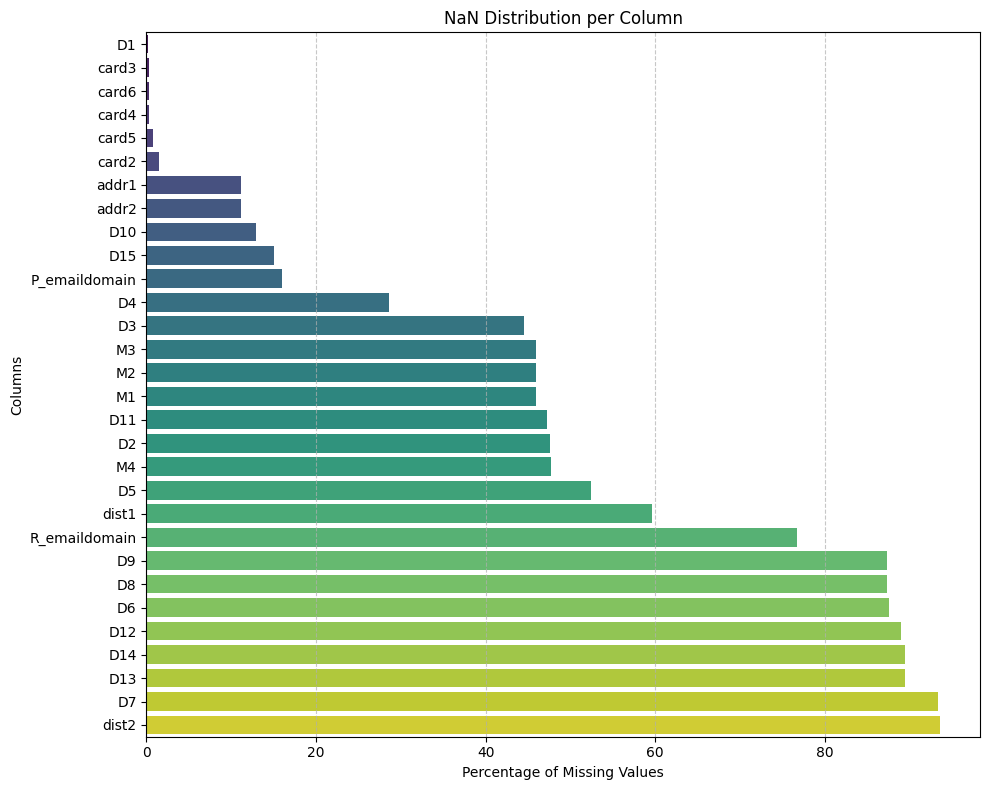

In [20]:
nan_distribution(df_first_50_feature)

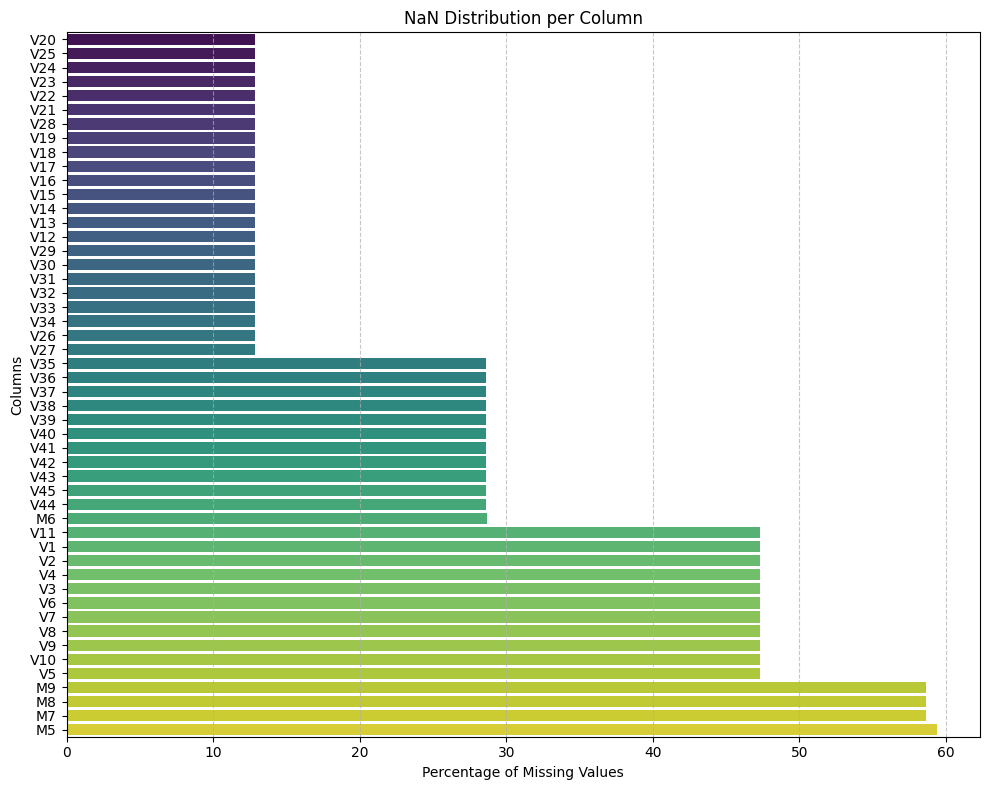

In [21]:
nan_distribution(df_train_tr[df_train_tr.columns[50:100]])

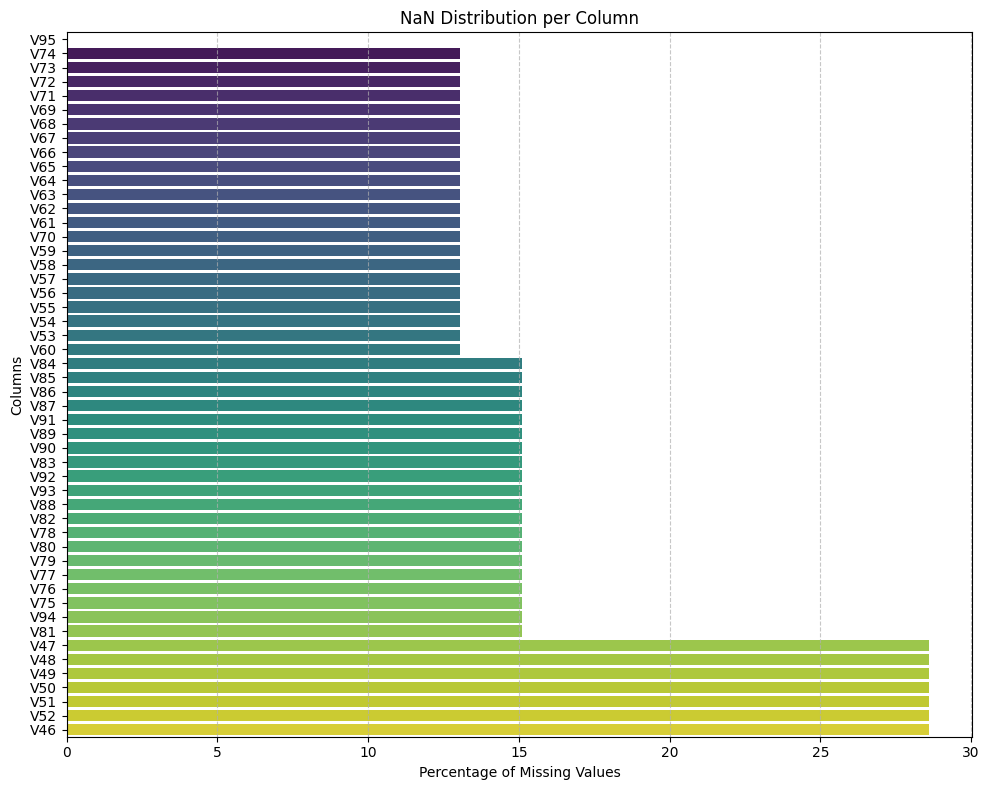

In [22]:
nan_distribution(df_train_tr[df_train_tr.columns[100:150]])

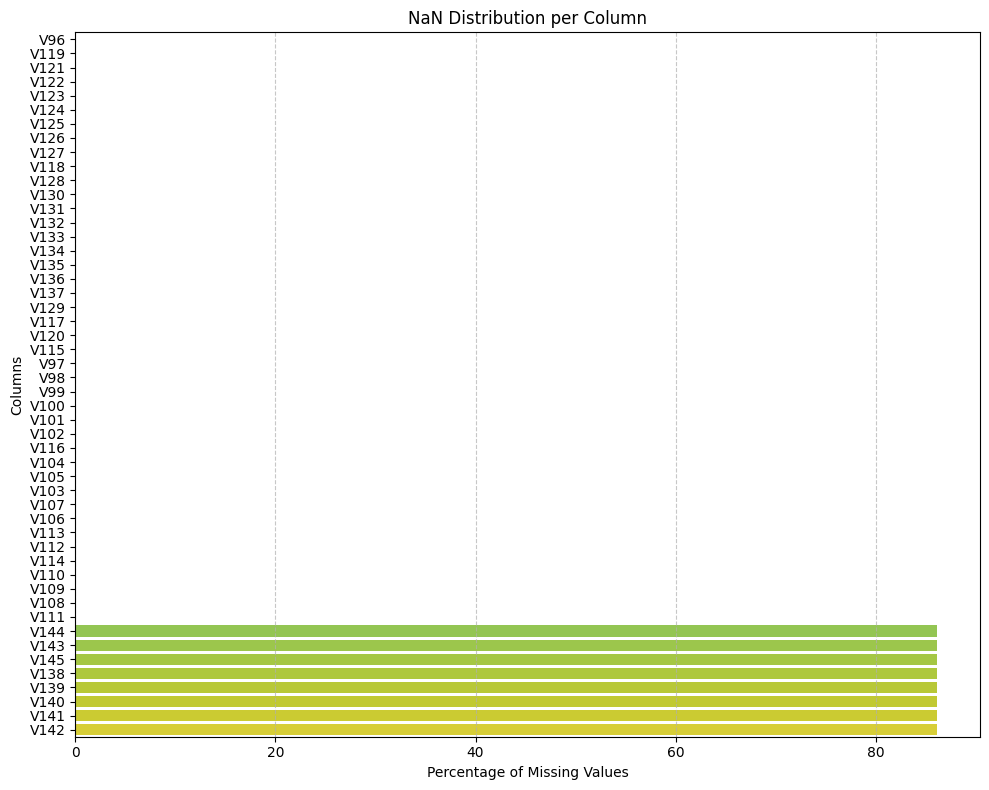

In [23]:
nan_distribution(df_train_tr[df_train_tr.columns[150:200]])

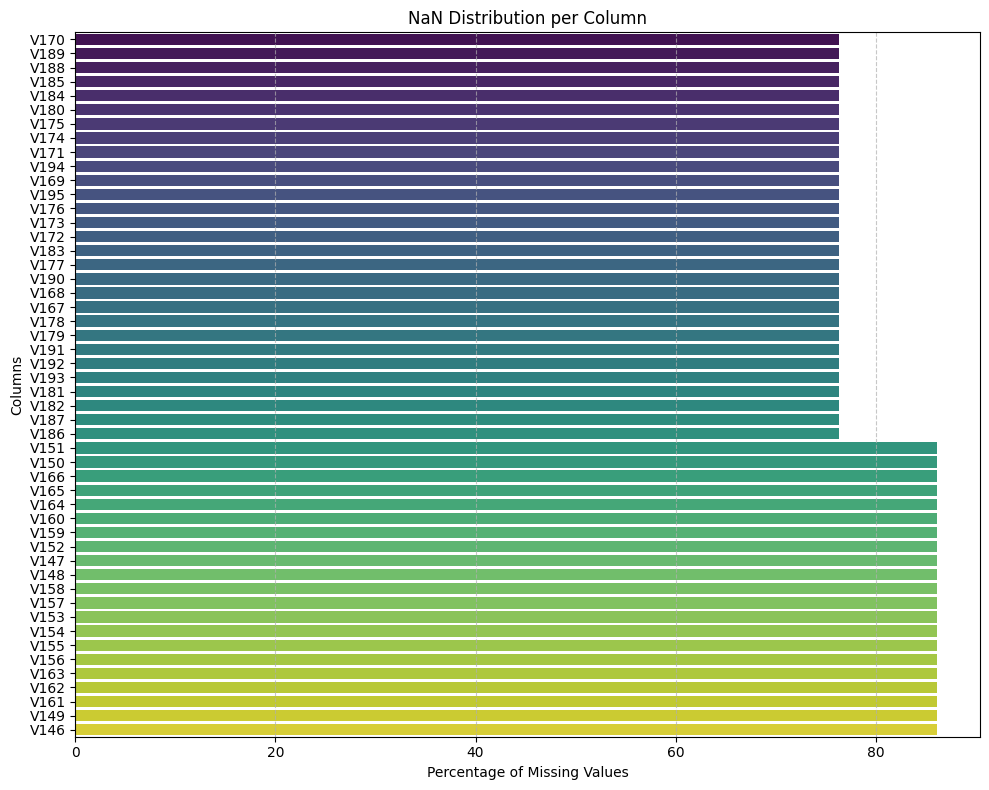

In [24]:
nan_distribution(df_train_tr[df_train_tr.columns[200:250]])

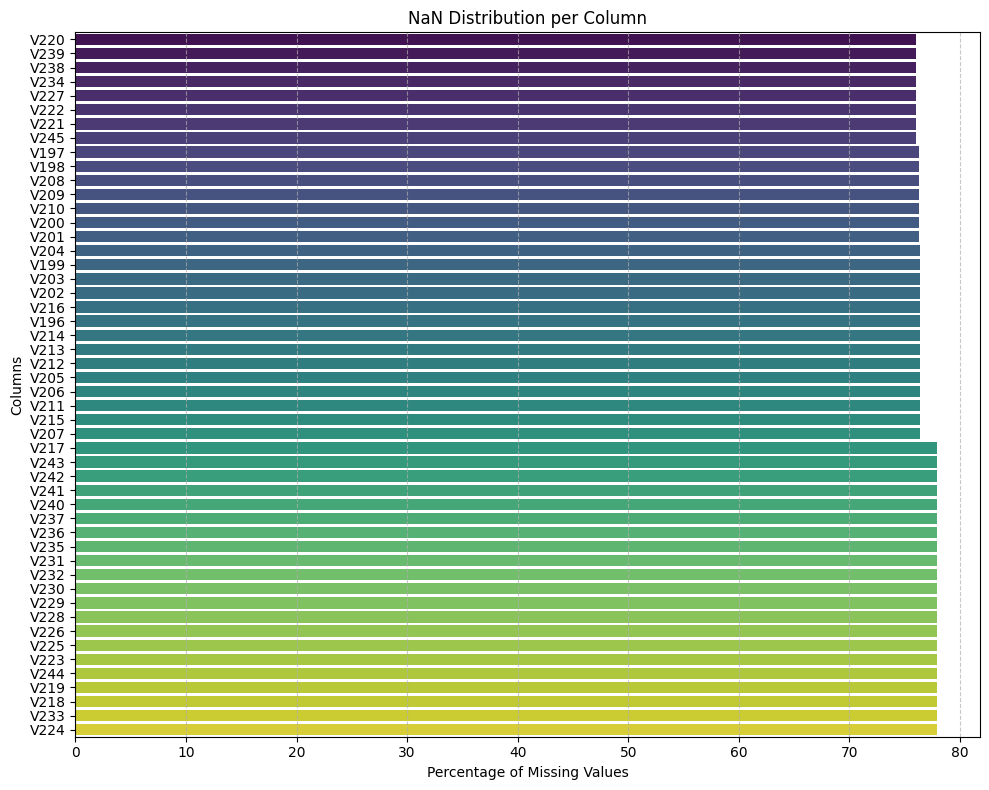

In [25]:
nan_distribution(df_train_tr[df_train_tr.columns[250:300]])

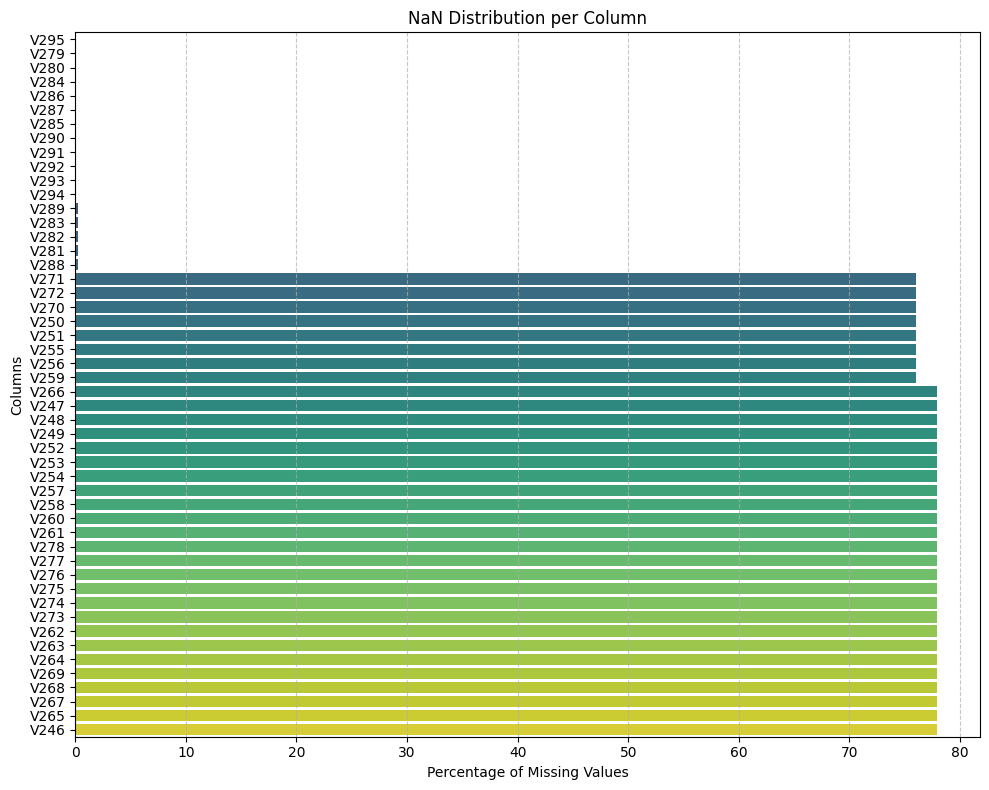

In [26]:
nan_distribution(df_train_tr[df_train_tr.columns[300:350]])

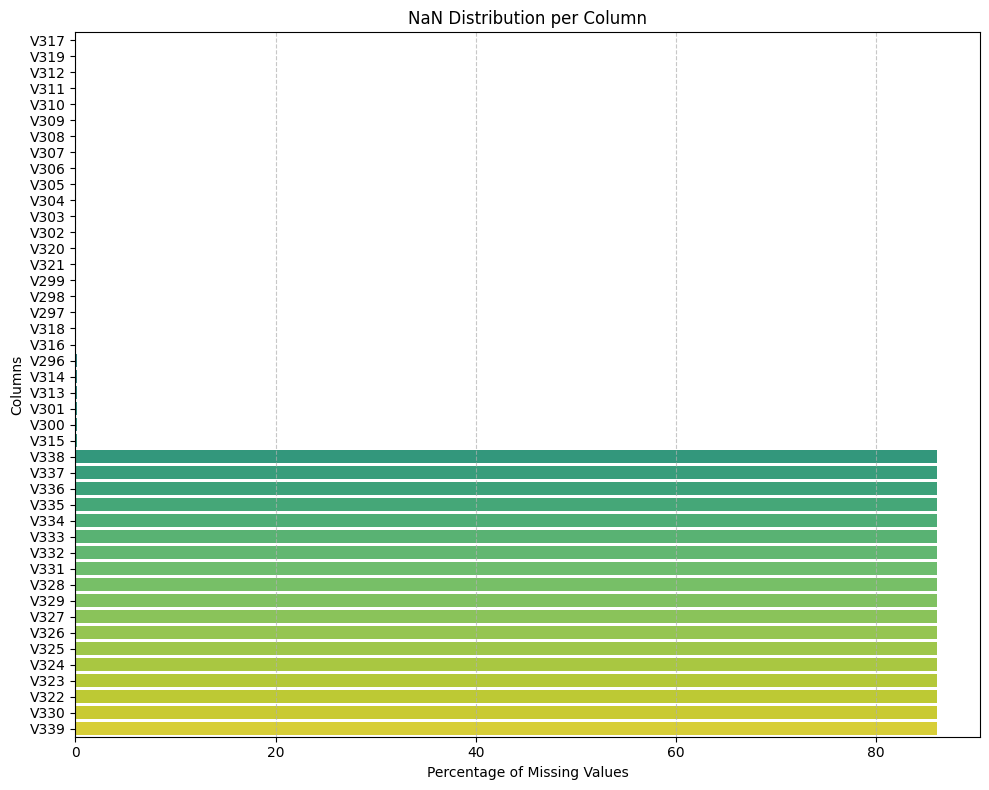

In [27]:
nan_distribution(df_train_tr[df_train_tr.columns[350:]])

In [28]:
high_nan_cols = df_train_tr.columns[df_train_tr.isna().mean() > 0.70]

print(f'{len(high_nan_cols)}: {high_nan_cols}')

168: Index(['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14',
       'V138',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=168)


In [29]:
from sklearn.model_selection import train_test_split

X = df_train_tr.drop(columns=['isFraud'])
y = df_train_tr['isFraud']

# Get unique card1 values
unique_card1s = df_train_tr['card1'].unique()

# Split card1 values into train/val/test
card1_train, card1_temp = train_test_split(unique_card1s, test_size=0.4, random_state=42)
card1_val, card1_test = train_test_split(card1_temp, test_size=0.5, random_state=42)

# Filter dataframe
X_transaction_train_df = X[df_train_tr['card1'].isin(card1_train)].copy()
y_transaction_train_df = y[df_train_tr['card1'].isin(card1_train)].copy()

X_transaction_val_df = X[df_train_tr['card1'].isin(card1_val)].copy()
y_transaction_val_df = y[df_train_tr['card1'].isin(card1_val)].copy()

X_transaction_test_df = X[df_train_tr['card1'].isin(card1_test)].copy()
y_transaction_test_df = y[df_train_tr['card1'].isin(card1_test)].copy()

In [30]:
X_transaction_train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
1,2987001,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,86510,49.0,W,5937,555.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,86522,159.0,W,12308,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
def check_balance(name, X, y):
    print(f"📊 {name} set:")
    print("Fraud distribution:")
    print(y.value_counts(normalize=True).rename("proportion"))
    print(y.value_counts().rename("count"))
    print(f"Total rows: {len(y)}")
    print(f"Number of features: {X.shape[1]}")
    print("-" * 40)

In [32]:
check_balance("Train", X_transaction_train_df, y_transaction_train_df)
check_balance("Validation", X_transaction_val_df, y_transaction_val_df)
check_balance("Test", X_transaction_test_df, y_transaction_test_df)

📊 Train set:
Fraud distribution:
isFraud
0    0.964869
1    0.035131
Name: proportion, dtype: float64
isFraud
0    362261
1     13190
Name: count, dtype: int64
Total rows: 375451
Number of features: 393
----------------------------------------
📊 Validation set:
Fraud distribution:
isFraud
0    0.961098
1    0.038902
Name: proportion, dtype: float64
isFraud
0    94820
1     3838
Name: count, dtype: int64
Total rows: 98658
Number of features: 393
----------------------------------------
📊 Test set:
Fraud distribution:
isFraud
0    0.96878
1    0.03122
Name: proportion, dtype: float64
isFraud
0    112796
1      3635
Name: count, dtype: int64
Total rows: 116431
Number of features: 393
----------------------------------------


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(y, title="Class Distribution"):
    counts = y.value_counts()
    plt.figure(figsize=(6,4))
    sns.barplot(x=counts.index, y=counts.values, palette="viridis")
    plt.title(title)
    plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
    plt.ylabel("Number of Samples")
    plt.xlabel("Class")
    for i, count in enumerate(counts.values):
        plt.text(i, count + 100, f'{count:,}', ha='center')
    plt.tight_layout()
    plt.show()

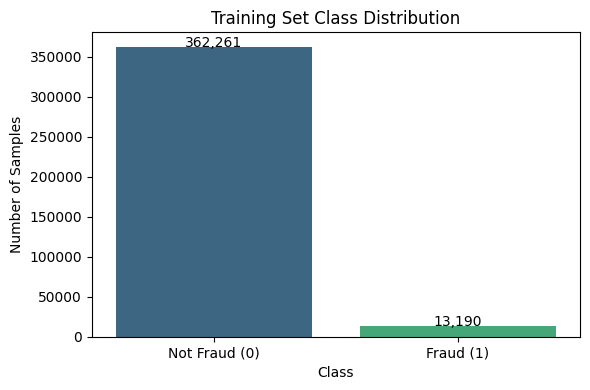

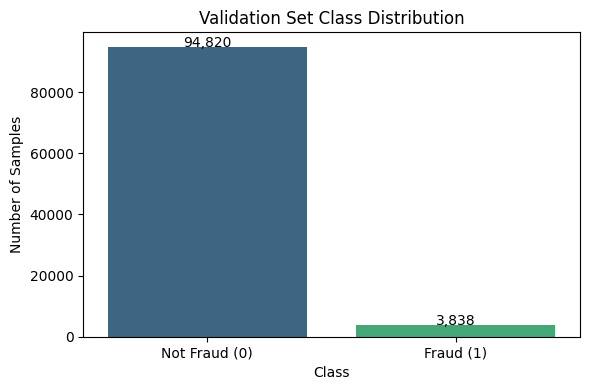

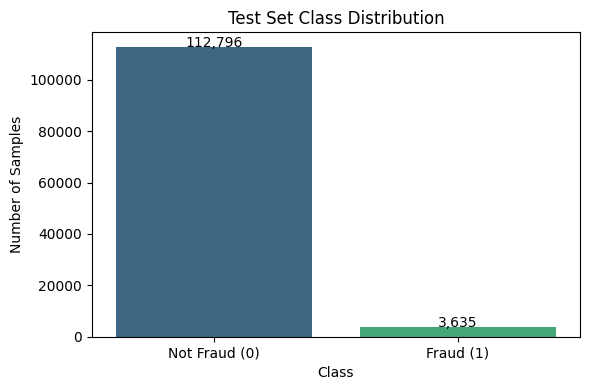

In [34]:
plot_class_distribution(y_transaction_train_df, "Training Set Class Distribution")
plot_class_distribution(y_transaction_val_df, "Validation Set Class Distribution")
plot_class_distribution(y_transaction_test_df, "Test Set Class Distribution")